In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from citipy import citipy
from config import weather_api_key
from datetime import datetime

In [2]:
# Build URL for Weather API call using my weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)
coordinates

[(-2.176327591651088, 80.92129189149517),
 (83.88495157447767, -73.74141238018085),
 (-30.450827129019203, 0.013463752255574946),
 (20.400355715742094, -66.33149927714965),
 (-83.71681355874952, -65.7110826976024),
 (-83.55742063043729, 159.46031979563872),
 (-65.75115137861869, 11.695693337133747),
 (-36.12014606514282, -7.09463754832197),
 (80.07718658600433, -54.573833952350256),
 (8.536634192582895, 14.457549705238222),
 (-52.64305589500002, 137.1840437550801),
 (-51.43409016929352, -37.06334426397029),
 (72.99754791215247, 120.16529817019335),
 (-7.974271258004094, -84.98525133148874),
 (60.95789949885463, -0.7478718903055324),
 (2.211347471794028, 54.50713441338391),
 (-62.697204629027695, -162.23447639914238),
 (47.32041315861807, -131.38158436608023),
 (42.891566418525656, -98.81865047663717),
 (71.65052392734006, 33.008970252292215),
 (-68.33598540499503, -68.366154380239),
 (38.977589959635395, -115.55016708279332),
 (71.86012106467362, 127.30136141883708),
 (-50.867891035496

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the citiy count to confirm sufficient count
len(cities)

602

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
        # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | dorado
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | rey bouba
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | sechura
Processing Record 14 of Set 1 | brae
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | mitchell
Processing Record 19 of Set 1 | vardo
Processing Record 20 of Set 1 | elko
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | timizart
Processing Record 24 of Set 

Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | hauterive
Processing Record 44 of Set 4 | zavetnoye
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | yuancheng
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | mudanjiang
Processing Record 3 of Set 5 | sinegorye
Processing Record 4 of Set 5 | darhan
Processing Record 5 of Set 5 | shelabolikha
Processing Record 6 of Set 5 | abbeville
Processing Record 7 of Set 5 | shelburne
Processing Record 8 of Set 5 | saint-philippe
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | ialibu
Processing Record 11 of Set 5 | merauke
Processing Record 12 of Set 5 | say

Processing Record 27 of Set 8 | faanui
Processing Record 28 of Set 8 | babanusah
City not found. Skipping...
Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | kungurtug
Processing Record 31 of Set 8 | maues
Processing Record 32 of Set 8 | sinfra
Processing Record 33 of Set 8 | ranong
Processing Record 34 of Set 8 | husavik
Processing Record 35 of Set 8 | antimakhia
City not found. Skipping...
Processing Record 36 of Set 8 | chumikan
Processing Record 37 of Set 8 | port lincoln
Processing Record 38 of Set 8 | saint-ambroise
Processing Record 39 of Set 8 | fort-shevchenko
Processing Record 40 of Set 8 | dicabisagan
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | montauban
Processing Record 43 of Set 8 | cabedelo
Processing Record 44 of Set 8 | coari
Processing Record 45 of Set 8 | solnechnyy
Processing Record 46 of Set 8 | yulara
Processing Record 47 of Set 8 | kyabe
Processing Record 48 of Set 8 | chalmette
Processing Record 49 of Set 8

Processing Record 15 of Set 12 | demir kapija
Processing Record 16 of Set 12 | kleck
City not found. Skipping...
Processing Record 17 of Set 12 | liku
Processing Record 18 of Set 12 | iralaya
Processing Record 19 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 12 | leh
Processing Record 21 of Set 12 | namibe
Processing Record 22 of Set 12 | kruisfontein
Processing Record 23 of Set 12 | garcovu
City not found. Skipping...
Processing Record 24 of Set 12 | vuktyl
Processing Record 25 of Set 12 | narrabri
Processing Record 26 of Set 12 | puerto cabezas
Processing Record 27 of Set 12 | tsimlyansk
Processing Record 28 of Set 12 | barcelos
Processing Record 29 of Set 12 | panzhihua
Processing Record 30 of Set 12 | bilibino
Processing Record 31 of Set 12 | xam nua
Processing Record 32 of Set 12 | saldanha
Processing Record 33 of Set 12 | sabha
Processing Record 34 of Set 12 | lucea
Processing Record 35 of Set 12 | locri
Processing Record 36 of Set 12 | quirinopolis

In [8]:
len(city_data)

558

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.50,66,97,4.43,MV,2022-06-07 18:11:15
1,Qaanaaq,77.4840,-69.3632,31.37,85,86,2.24,GL,2022-06-07 18:12:54
2,Jamestown,42.0970,-79.2353,67.59,75,100,8.05,US,2022-06-07 18:07:55
3,Dorado,18.4588,-66.2677,92.71,74,40,16.11,PR,2022-06-07 18:11:06
4,Ushuaia,-54.8000,-68.3000,44.22,86,63,7.81,AR,2022-06-07 18:11:46
5,Bluff,-46.6000,168.3333,48.79,82,52,11.01,NZ,2022-06-07 18:12:55
6,Hermanus,-34.4187,19.2345,65.61,48,0,2.75,ZA,2022-06-07 18:12:56
7,Upernavik,72.7868,-56.1549,32.56,77,34,5.68,GL,2022-06-07 18:12:56
8,Rey Bouba,8.6724,14.1786,88.75,41,18,4.52,CM,2022-06-07 18:12:57
9,New Norfolk,-42.7826,147.0587,42.30,86,91,1.99,AU,2022-06-07 18:12:57


In [10]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-06-07 18:11:15,-0.6000,73.0833,83.50,66,97,4.43
1,Qaanaaq,GL,2022-06-07 18:12:54,77.4840,-69.3632,31.37,85,86,2.24
2,Jamestown,US,2022-06-07 18:07:55,42.0970,-79.2353,67.59,75,100,8.05
3,Dorado,PR,2022-06-07 18:11:06,18.4588,-66.2677,92.71,74,40,16.11
4,Ushuaia,AR,2022-06-07 18:11:46,-54.8000,-68.3000,44.22,86,63,7.81
5,Bluff,NZ,2022-06-07 18:12:55,-46.6000,168.3333,48.79,82,52,11.01
6,Hermanus,ZA,2022-06-07 18:12:56,-34.4187,19.2345,65.61,48,0,2.75
7,Upernavik,GL,2022-06-07 18:12:56,72.7868,-56.1549,32.56,77,34,5.68
8,Rey Bouba,CM,2022-06-07 18:12:57,8.6724,14.1786,88.75,41,18,4.52
9,New Norfolk,AU,2022-06-07 18:12:57,-42.7826,147.0587,42.30,86,91,1.99


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data DataFrame into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/07/22'

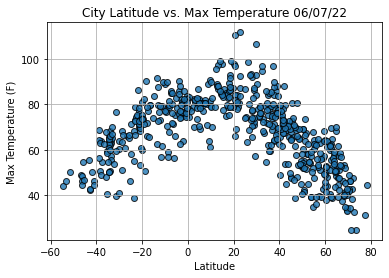

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

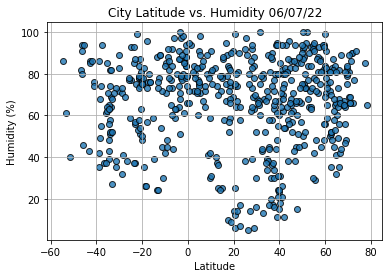

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

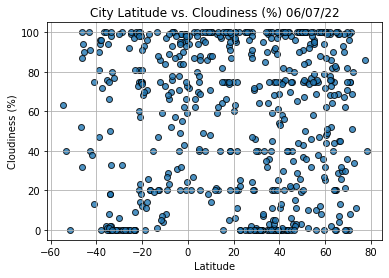

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

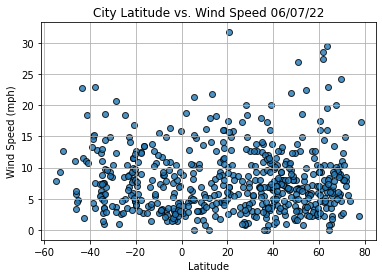

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2022-06-07 18:12:54,77.4840,-69.3632,31.37,85,86,2.24
2,Jamestown,US,2022-06-07 18:07:55,42.0970,-79.2353,67.59,75,100,8.05
3,Dorado,PR,2022-06-07 18:11:06,18.4588,-66.2677,92.71,74,40,16.11
7,Upernavik,GL,2022-06-07 18:12:56,72.7868,-56.1549,32.56,77,34,5.68
8,Rey Bouba,CM,2022-06-07 18:12:57,8.6724,14.1786,88.75,41,18,4.52


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

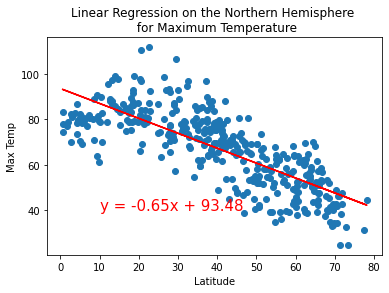

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

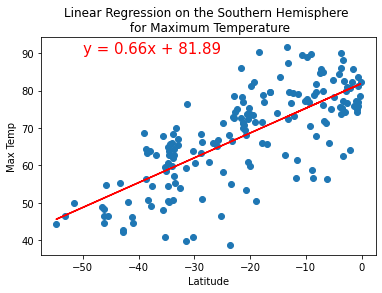

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

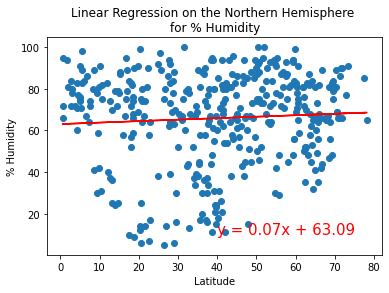

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

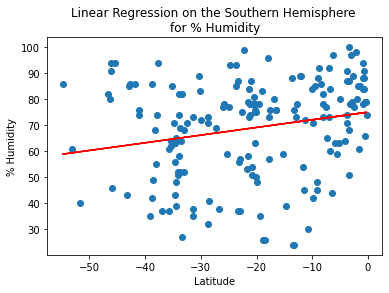

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

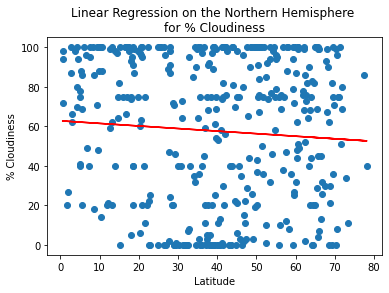

In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

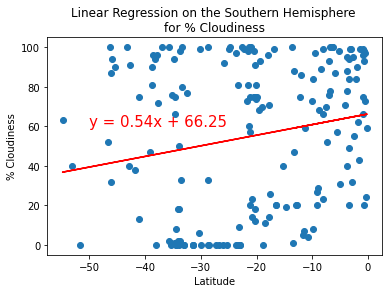

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))


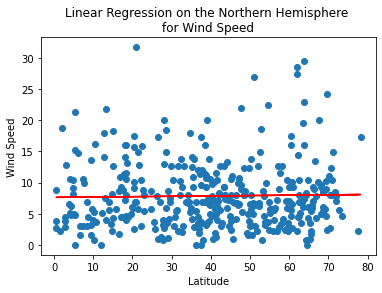

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

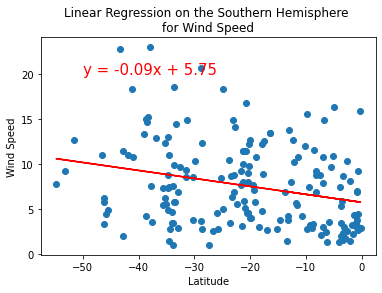

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))